# IT Helpdesk Operations – Exploratory Data Analysis (EDA)
### Beacon Mobility – Leena AI Ticketing System

This notebook analyzes Helpdesk ticket data to identify common issues, operational bottlenecks, SLA performance, and trends by Region and Location.  
The goal is to support IT operations, staffing decisions, and process improvement initiatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load the Dataset

In [4]:
df = pd.read_excel(r"C:/Users/brand/OneDrive/IT-Helpdesk-Data/Raw_Data_Leena_AI_Jan_Dec_2025_FINAL_ENRICHED.xlsx")  # update path
df.head()

,Ticket Id,Priority,Category,Sub Category,Description,Last Comment,Status,Created On,Closing Date,Region,...,Prioritization: Discretionary Score,Prioritization: Weighted Score,Prioritization: Total Score,Prioritization: Rank,Month,Week Start,Year,__QC_TextBlob,__QC_IssueType_Auto,__QC_SubIssue_Auto
0,IT00000035273,medium,Beacon Buddy,NaN,Hi All –_x000D_\n_x000D_\nJust following up on...,Per Ryan Rounkles. He asked to close the ticket.,Resolved,2025-12-08 16:28:00,2026-01-27 15:52:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hi all – x000d x000d just following up on this...,Access & Account Management,NaN
1,IT00000035981,medium,Beacon Connect,Not receiving notification / emails,CAUTION: This email originated from outside th...,"Hello Sabrina, \nWe will be closing this ticke...",Resolved,2025-12-18 08:45:00,2026-01-26 15:38:00,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,NaN,NaN
2,IT00000035943,medium,Beacon Connect,Data Entry,"Hello,_x000D_\n_x000D_\nPlease add calendar ev...","Hi,\nThe caelndar info have been uploaded to t...",Resolved,2025-12-17 14:35:00,2026-01-22 10:56:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hello, x000d x000d please add calendar events ...",Data Integrity,Roster / Manifest
3,IT00000035738,medium,Beacon Connect,Not receiving notification / emails,CAUTION: This email originated from outside th...,"Good day, Mallory,\nI hope you are doing well....",Resolved,2025-12-15 15:47:00,2026-01-20 15:25:00,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,Data Integrity,Roster / Manifest
4,IT00000035941,medium,Beacon Connect,Data Entry,"Hello,_x000D_\n_x000D_\nPlease add calendar ev...",All of the calendar events have been created,Resolved,2025-12-17 14:31:00,2026-01-19 14:38:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hello, x000d x000d please add calendar events ...",Data Integrity,Roster / Manifest


## 2. Initial Data Inspection

This section explores the structure, data types, missing values, and basic statistics of the dataset.

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Ticket Id                               2487 non-null   str           
 1   Priority                                2487 non-null   str           
 2   Category                                2487 non-null   str           
 3   Sub Category                            2108 non-null   str           
 4   Description                             2487 non-null   str           
 5   Last Comment                            2485 non-null   str           
 6   Status                                  2487 non-null   str           
 7   Created On                              2487 non-null   datetime64[us]
 8   Closing Date                            2481 non-null   datetime64[us]
 9   Region                                  2487 non-null   str    

In [6]:
df.describe(include='all')

,Ticket Id,Priority,Category,Sub Category,Description,Last Comment,Status,Created On,Closing Date,Region,...,Prioritization: Discretionary Score,Prioritization: Weighted Score,Prioritization: Total Score,Prioritization: Rank,Month,Week Start,Year,__QC_TextBlob,__QC_IssueType_Auto,__QC_SubIssue_Auto
count,2487,2487,2487,2108,2487,2485,2487,2487,2481,2487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2487,2396,1643
unique,2487,4,3,11,2375,2263,5,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2482,4,13
top,IT00000035273,medium,Beacon Connect,Data Entry,Please see attached bus referral Jesse Babcock,"Hi Everyone,\nThank you for your patient.\nThe...",Resolved,NaN,NaN,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,Data Integrity,Roster / Manifest
freq,1,2395,2450,783,12,21,2481,NaN,NaN,1058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1234,859
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-16 09:31:12.786489,2025-08-20 20:00:23.022974,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-02 08:16:00,2025-01-02 09:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12 13:13:30,2025-06-18 09:20:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-08 07:09:00,2025-09-15 15:34:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-23 19:09:00,2025-10-28 11:38:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-31 14:01:00,2026-01-27 15:52:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Ticket Id                 0
Priority                  0
Category                  0
Sub Category            379
Description               0
                       ... 
Week Start             2487
Year                   2487
__QC_TextBlob             0
__QC_IssueType_Auto      91
__QC_SubIssue_Auto      844
Length: 83, dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

Ticket Id              2487
Priority                  4
Category                  3
Sub Category             11
Description            2375
                       ... 
Week Start                0
Year                      0
__QC_TextBlob          2482
__QC_IssueType_Auto       4
__QC_SubIssue_Auto       13
Length: 83, dtype: int64

## 3. Data Cleaning & Feature Engineering

This section converts date fields, creates new operational metrics, and prepares the dataset for analysis.

In [10]:
date_cols = ['Created On', 'Closing Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [12]:
df['Resolution Time (hrs)'] = (df['Closing Date'] - df['Created On']).dt.total_seconds() / 3600

In [13]:
df['Month'] = df['Created On'].dt.month_name()
df['Weekday'] = df['Created On'].dt.day_name()
df['Hour'] = df['Created On'].dt.hour
df['Week'] = df['Created On'].dt.isocalendar().week

In [14]:
df[['Resolution Time (hrs)', 'Month', 'Weekday', 'Hour']].head()

,Resolution Time (hrs),Month,Weekday,Hour
0,1199.400000,December,Monday,16
1,942.883333,December,Thursday,8
2,860.350000,December,Wednesday,14
3,863.633333,December,Monday,15
4,792.116667,December,Wednesday,14


# 4. Exploratory Data Analysis (EDA)

## 4.1 Ticket Volume Analysis

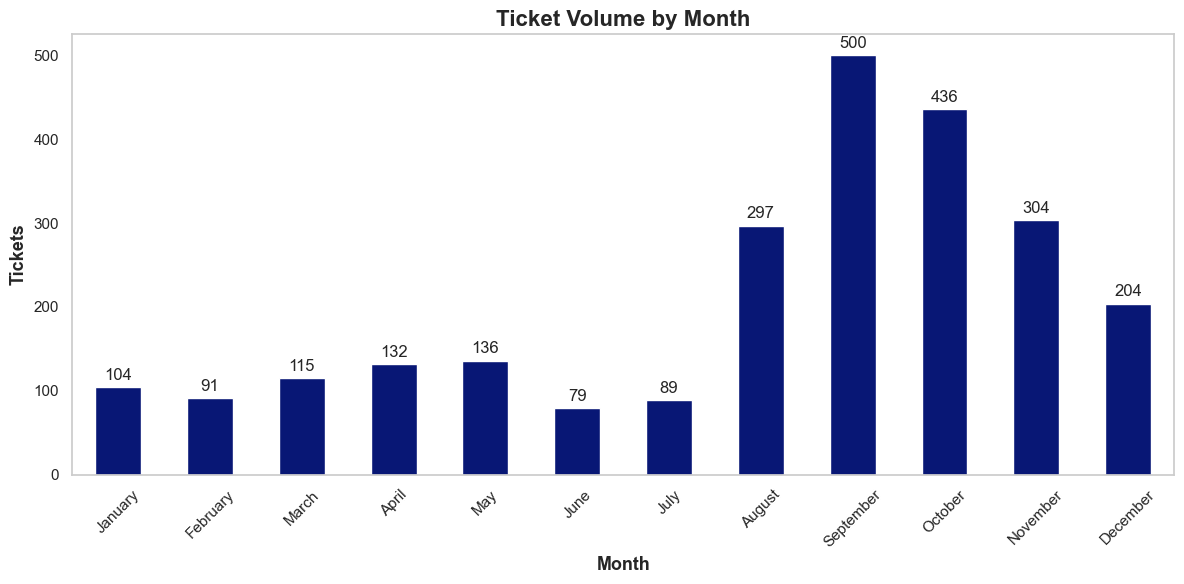

In [15]:

# Get counts (optionally sort by month name/order if needed)
order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
counts = df['Month'].value_counts().reindex(order).dropna()

ax = counts.plot(kind='bar', color='#081775', rot=45)

# Add labels on top of bars
bars = ax.containers[0]
ax.bar_label(bars, padding=3)   # padding controls the gap above the bar

ax.set_title('Ticket Volume by Month',fontsize=16,fontweight='bold')
ax.set_xlabel('Month',fontsize=13,fontweight='bold')
ax.set_ylabel('Tickets',fontsize=13,fontweight='bold')

#No Background Grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

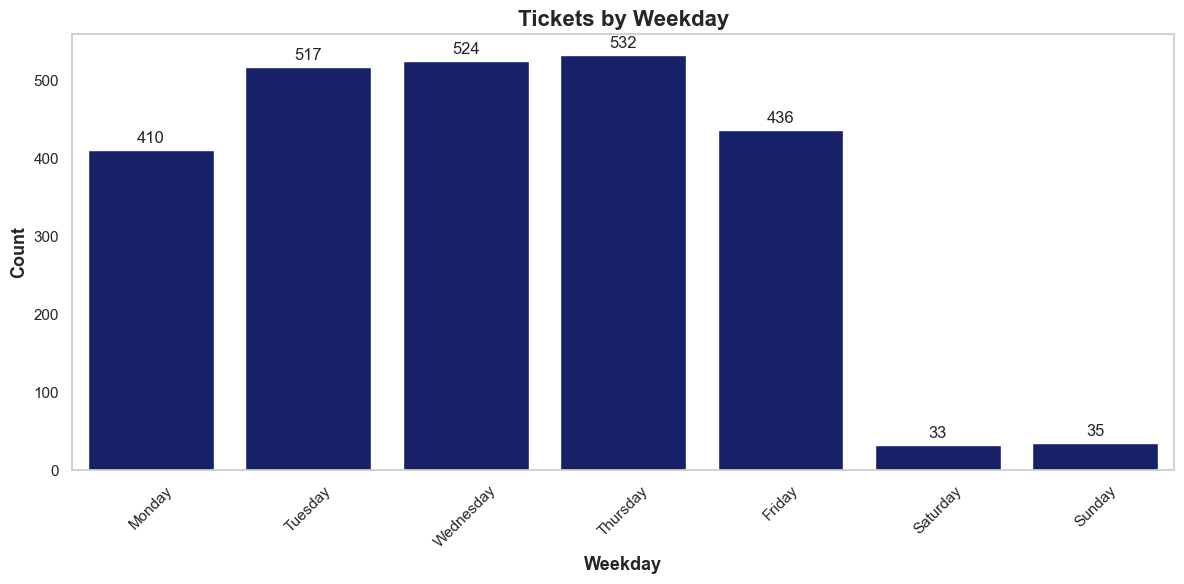

In [16]:

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots()
sns.countplot(data=df, x='Weekday', order=order, ax=ax, color='#081775')

# Get the bar container and label each bar with its height (count)
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # padding creates a small gap above bars

ax.set_title('Tickets by Weekday',fontsize=16,fontweight='bold')
ax.set_xlabel('Weekday',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')
#No background grid
ax.grid(False)
plt.xticks(fontsize=11,rotation=45)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


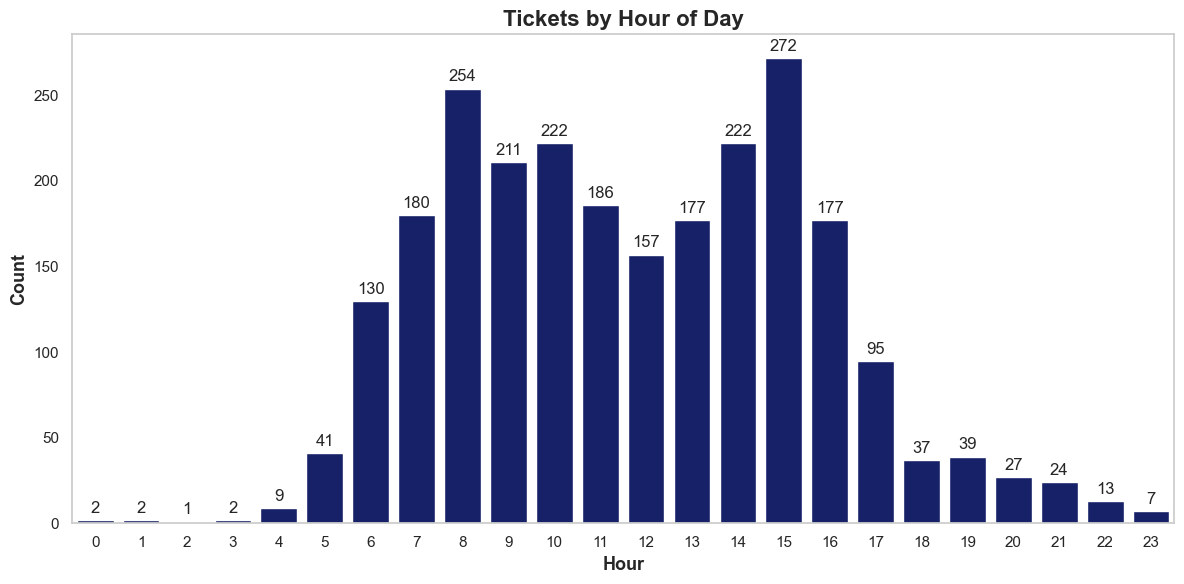

In [17]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='Hour', ax=ax, color='#081775')

# Add labels on top of bars
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # small gap above the bars

ax.set_title('Tickets by Hour of Day',fontsize=16,fontweight='bold')
ax.set_xlabel('Hour',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')
#No background grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## 4.2 Region & Location Analysis

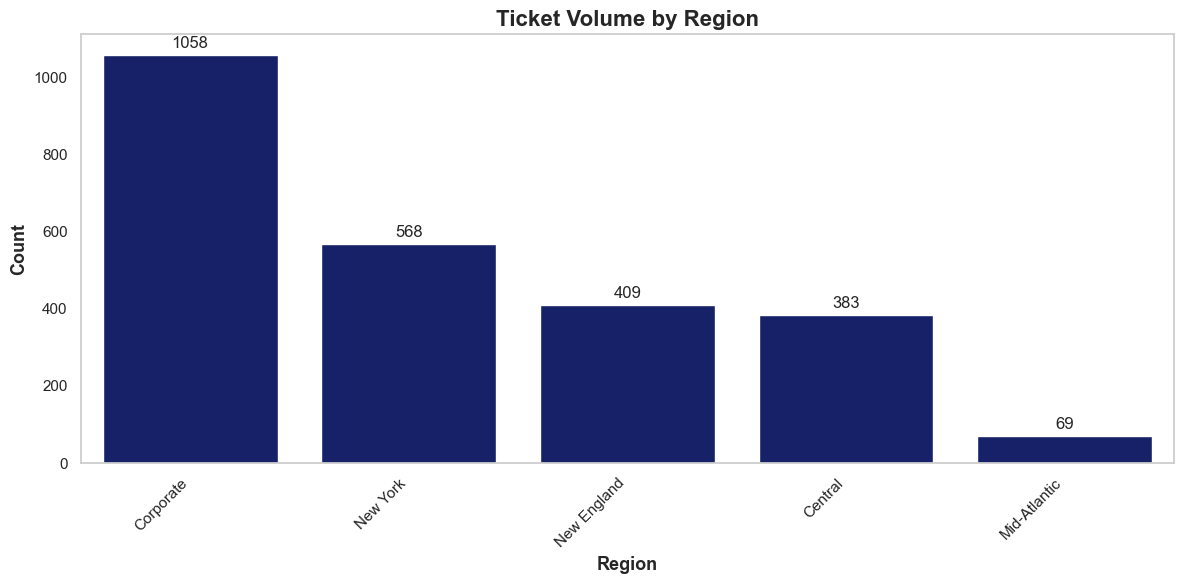

In [18]:

fig, ax = plt.subplots()
sns.countplot(
    data=df,
    x='Region',
    order=df['Region'].value_counts().index,  # order by frequency
    ax=ax,
    color='#081775'
)

# Add labels on top of bars
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # small gap above bars

ax.set_title('Ticket Volume by Region',fontsize=16,fontweight='bold')
ax.set_xlabel('Region',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')
#No background grid
ax.grid(False)
plt.xticks(fontsize=11,rotation=45, ha='right')  # better for long region names
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

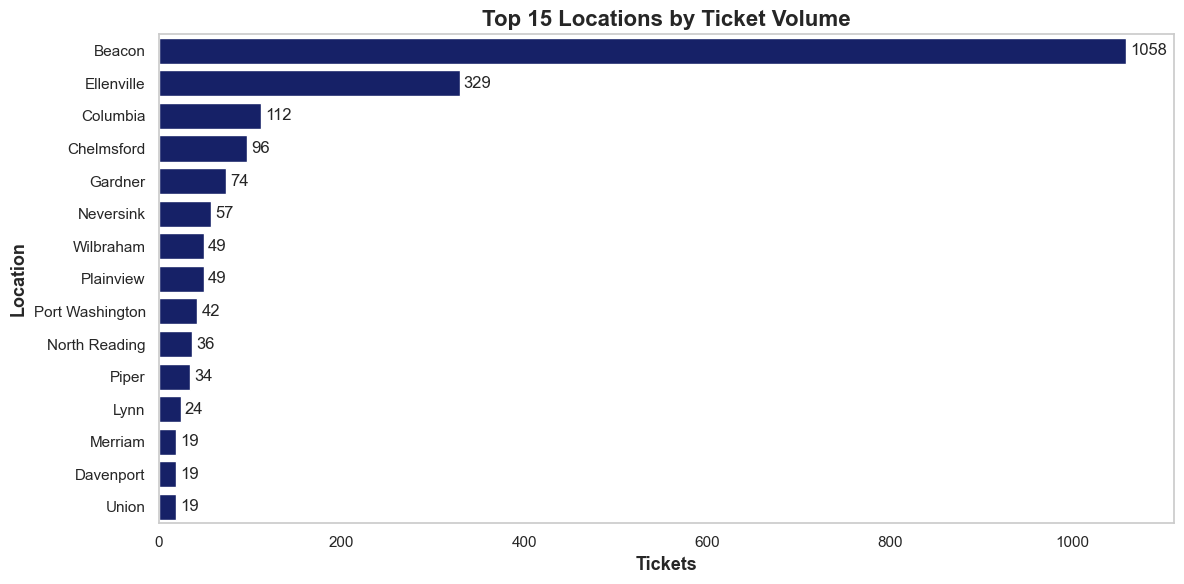

In [19]:

top_locations = df['Location'].value_counts().head(15)

fig, ax = plt.subplots()
sns.barplot(x=top_locations.values, y=top_locations.index, ax=ax, color='#081775')

# Add labels at the end of each horizontal bar
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # small gap to the right of bars

ax.set_title('Top 15 Locations by Ticket Volume',fontsize=16,fontweight='bold')
ax.set_xlabel('Tickets',fontsize=13,fontweight='bold')
ax.set_ylabel('Location',fontsize=13,fontweight='bold')
#No  Background grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## 4.3 Category & Subcategory Analysis

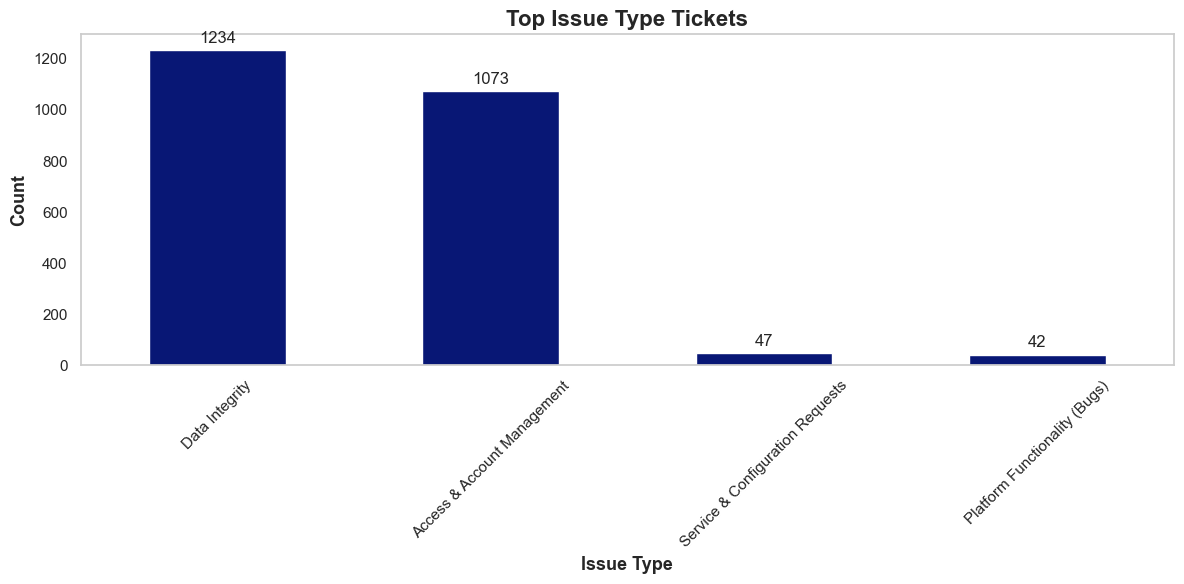

In [20]:

counts = df['Issue Type'].value_counts().head(10)

ax = counts.plot(kind='bar', color='#081775', rot=45)

# Add labels on top of each bar
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # small gap above bars

ax.set_title('Top Issue Type Tickets',fontsize=16,fontweight='bold')
ax.set_xlabel('Issue Type',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')

#No Background grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

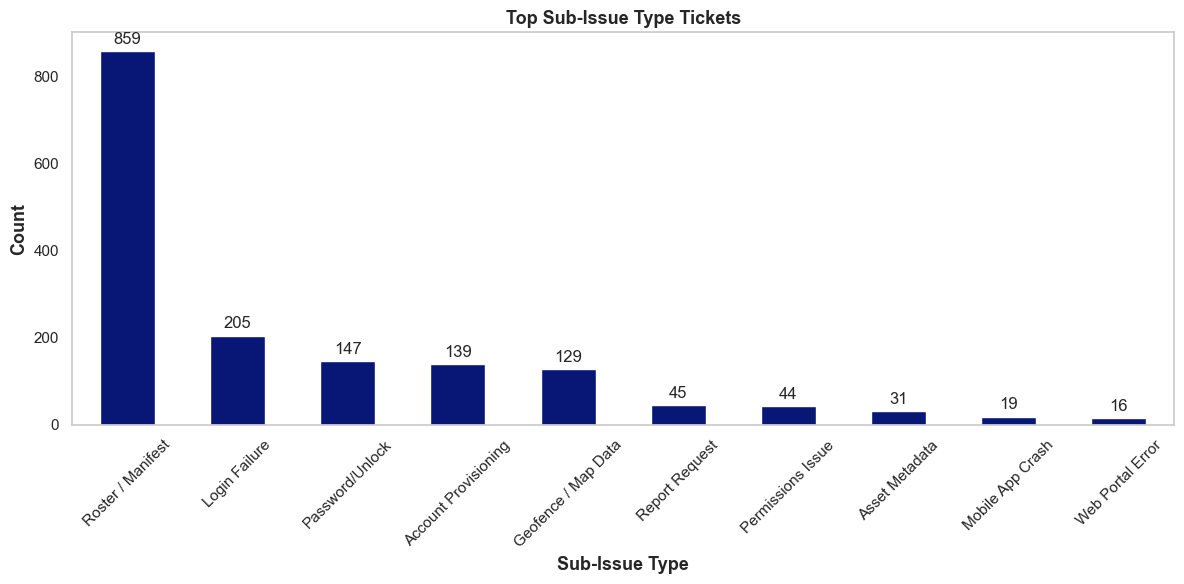

In [21]:
counts = df['Sub-Issue Type'].value_counts().head(10)

ax = counts.plot(kind='bar', color='#081775', rot=45)

# Add labels on top of each bar
bars = ax.containers[0]
ax.bar_label(bars, padding=3)  # small gap above bars

ax.set_title('Top Sub-Issue Type Tickets',fontsize=13,fontweight='bold')
ax.set_xlabel('Sub-Issue Type',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')

#No Background grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

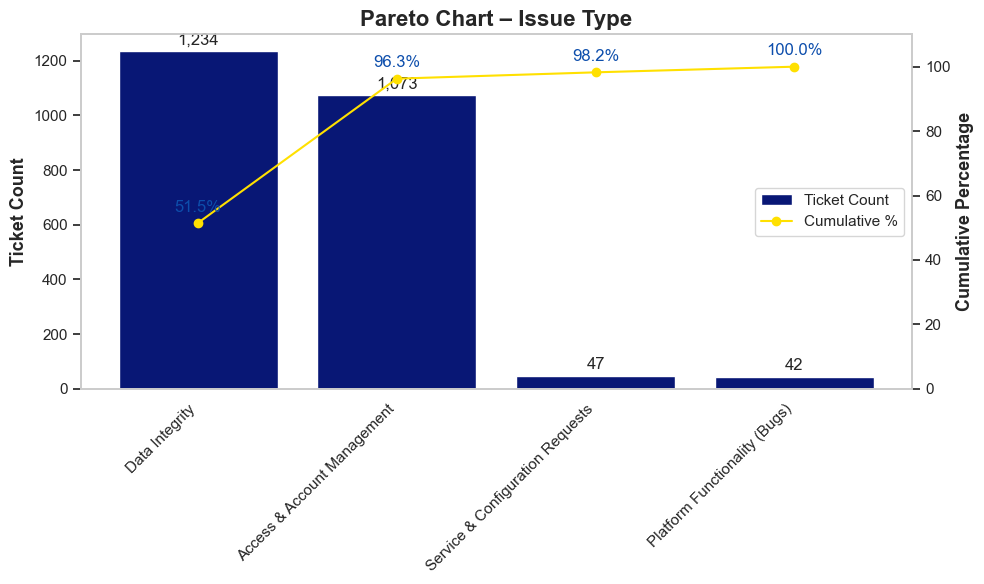

In [22]:
# Data (already sorted because value_counts returns descending)
issue_type_counts = df['Issue Type'].value_counts()
cum_percentage = issue_type_counts.cumsum() / issue_type_counts.sum() * 100

# X positions for bars/points
x = range(len(issue_type_counts))

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Bars (counts) ---
bars = ax1.bar(x, issue_type_counts.values, color='#081775', label='Ticket Count')

# Add count labels on top of each bar (with thousands separators)
ax1.bar_label(bars, labels=[f"{v:,.0f}" for v in issue_type_counts.values], padding=3)

ax1.set_ylabel('Ticket Count',fontsize=13,fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(issue_type_counts.index, rotation=45, ha='right')

# Optional grid for readability
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# --- Line (cumulative %) on a twin axis ---
ax2 = ax1.twinx()
line = ax2.plot(x, cum_percentage.values, color='#FFE000', marker='o', label='Cumulative %')

# Format right axis as percentage
ax2.set_ylabel('Cumulative Percentage',fontsize=13,fontweight='bold')
ax2.set_ylim(0, 110)  # a little headroom above 100%
ax2.set_yticks([0, 20, 40, 60, 80, 100])

# Add percentage labels near each point
for xi, yi in zip(x, cum_percentage.values):
    ax2.annotate(f"{yi:.1f}%", xy=(xi, yi), xytext=(0, 6),
                 textcoords='offset points', ha='center', va='bottom', color='#0D4EAC')

# Title and layout
plt.title('Pareto Chart – Issue Type',fontsize=16,fontweight='bold')
fig.tight_layout()

# Optional combined legend
# Create a single legend combining bar and line handles
handles = [bars, line[0]]
labels = ['Ticket Count', 'Cumulative %']
ax1.legend(handles, labels, loc='center right')

#No Background grid
ax1.grid(False)
ax2.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

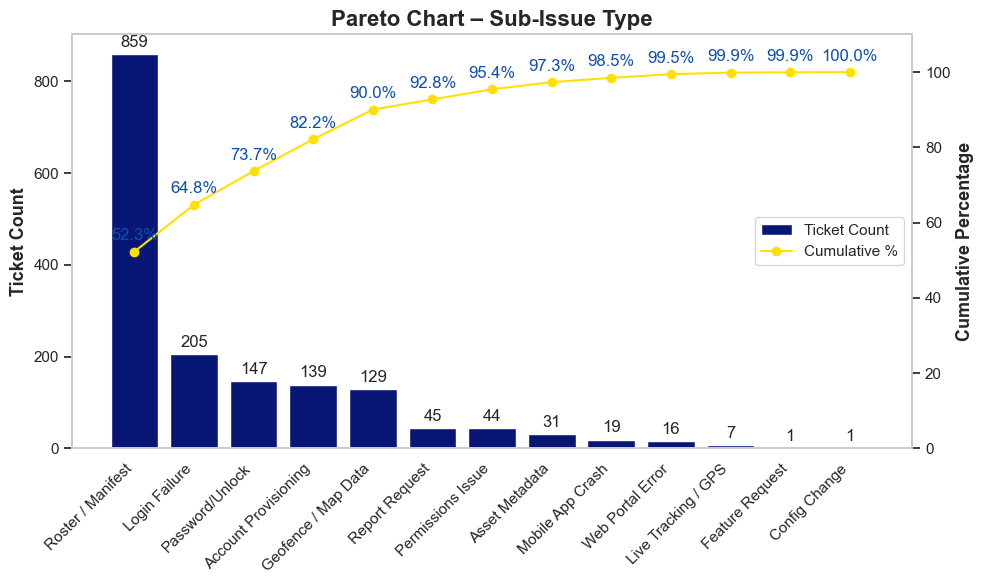

In [23]:
# Data (value_counts is descending—ideal for Pareto)
subissue_type_counts = df['Sub-Issue Type'].value_counts()
cum_percentage = subissue_type_counts.cumsum() / subissue_type_counts.sum() * 100

# X positions
x = range(len(subissue_type_counts))

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Bars (counts) ---
bars = ax1.bar(x, subissue_type_counts.values, color='#081775', label='Ticket Count')

# Add count labels on bars (with thousands separators)
ax1.bar_label(bars, labels=[f"{v:,.0f}" for v in subissue_type_counts.values], padding=3)

ax1.set_ylabel('Ticket Count',fontsize=13,fontweight='bold')
ax1.set_xticks(list(x))
ax1.set_xticklabels(subissue_type_counts.index, rotation=45, ha='right')

# Optional: grid for readability
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# --- Line (cumulative %) on twin axis ---
ax2 = ax1.twinx()
line = ax2.plot(x, cum_percentage.values, color='#FFE000', marker='o', label='Cumulative %')

ax2.set_ylabel('Cumulative Percentage',fontsize=13,fontweight='bold')
ax2.set_ylim(0, 110)                       # headroom above 100%
ax2.set_yticks([0, 20, 40, 60, 80, 100])

# Add percentage labels near each line point
for xi, yi in zip(x, cum_percentage.values):
    ax2.annotate(f"{yi:.1f}%", xy=(xi, yi), xytext=(0, 6),
                 textcoords='offset points', ha='center', va='bottom', color='#0D4EAC')

plt.title('Pareto Chart – Sub-Issue Type',fontsize=16,fontweight='bold')
fig.tight_layout()

# Optional combined legend
handles = [bars, line[0]]
labels = ['Ticket Count', 'Cumulative %']
ax1.legend(handles, labels, loc='center right')

#No Background grid
ax1.grid(False)
ax2.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

## 4.4 Resolution Time Analysis

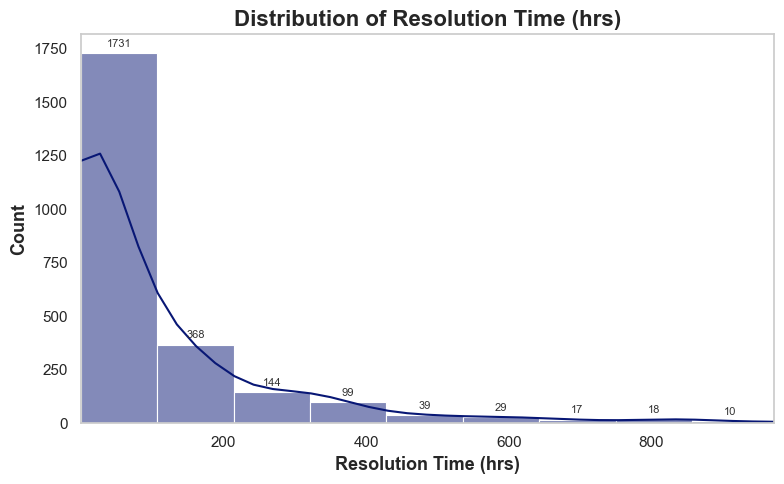

In [24]:
# --- Data prep ---
col = 'Resolution Time (hrs)'
x = df[col].dropna().values

# Choose bins (keep original setting)
bins = 50

# Compute a focus range for visibility (Option 2): limit x-axis to P99
p99 = np.percentile(x, 99)  # Adjust to 95, 98, 99.5 as needed

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(x, bins=bins, kde=True, ax=ax, color='#081775')

# Focus on the bulk of the distribution (without deleting data)
ax.set_xlim(left=np.nanmin(x), right=p99)

# Add count labels on top of each histogram bin
for p in ax.patches:  # each rectangle drawn by histplot
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{int(height)}",
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8,
            color="#333",
        )

# Styling for visibility
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_title('Distribution of Resolution Time (hrs)',fontsize=16,fontweight='bold')
ax.set_xlabel('Resolution Time (hrs)',fontsize=13,fontweight='bold')
ax.set_ylabel('Count',fontsize=13,fontweight='bold')

#No Background grid
ax.grid(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_6836\1322718812.py:87: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.boxplot(


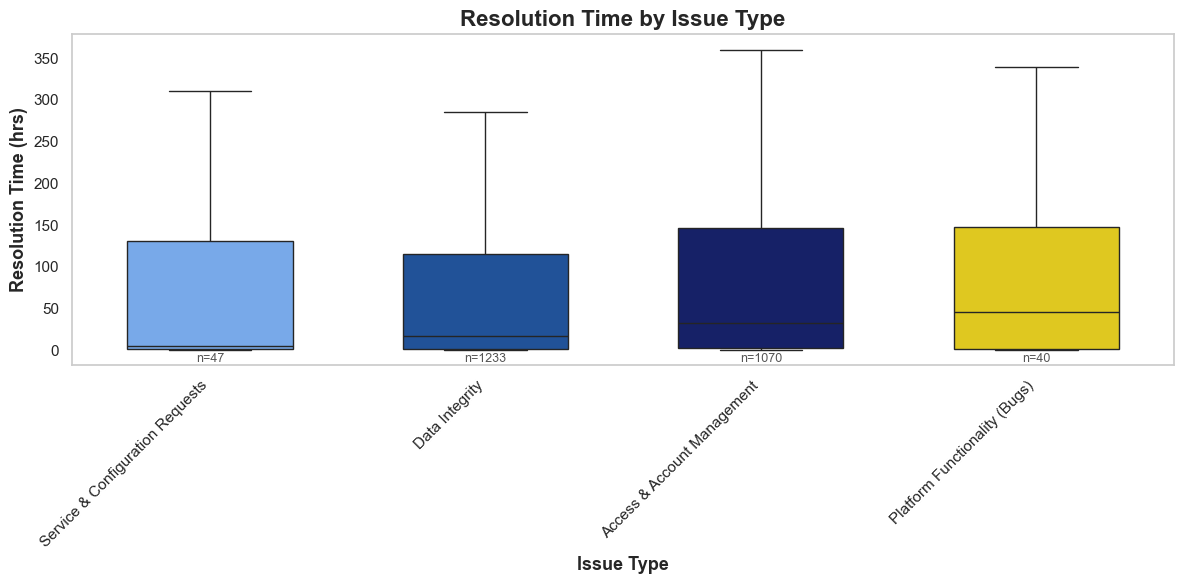

In [25]:
#Personalized pallete

beacon_palette = [
    "#081775",  
    "#0d4eac",  
    "#ffe000",  
    "#65a7fc",  
    "#b6d2fa",  
    "#a1bbc6",  
    "#dce7ed",  
    "#eca313",  
    "#ffce1f", 
    "#47b462",
    "#98d3ae",
    "#fcf18b",
    "#fbb7c6",
    "#fffcDF",
    "#F3f4f5"
]


#If you have more categories than colors, extend automatically
if len(beacon_palette) < len(order):
    # auto-extend using another palette
    extra = sns.color_palette("tab20", n_colors=len(order) - len(beacon_palette))
    beacon_palette = beacon_palette + list(extra)


# ==== Configuration ====
COL_X = 'Issue Type'
COL_Y = 'Resolution Time (hrs)'

POINT_SIZE = 2.5
POINT_ALPHA = 0.5
POINT_COLOR = 'tab:blue'
JITTER = 0.25

LOW_P = 1
HIGH_P = 99

FIGSIZE = (12, 6)
PALETTE = beacon_palette  # now valid because we'll pass hue=COL_X

# ==== Data prep ====
df = df.rename(columns={c: c.strip() if isinstance(c, str) else c for c in df.columns})

if COL_X not in df.columns or COL_Y not in df.columns:
    raise KeyError(f"Columns not found. Got columns: {list(df.columns)}")

plot_df = df[[COL_X, COL_Y]].copy()
plot_df[COL_Y] = pd.to_numeric(plot_df[COL_Y], errors='coerce')
plot_df = plot_df.dropna(subset=[COL_X, COL_Y])

if plot_df.empty:
    raise ValueError(f"No valid data to plot after cleaning {COL_X}/{COL_Y}.")

order = (
    plot_df.groupby(COL_X)[COL_Y]
    .median()
    .sort_values()
    .index
    .tolist()
)

def _central_slice(g: pd.DataFrame) -> pd.DataFrame:
    if len(g) < 5:
        return g
    lo = np.percentile(g[COL_Y], LOW_P)
    hi = np.percentile(g[COL_Y], HIGH_P)
    return g[(g[COL_Y] >= lo) & (g[COL_Y] <= hi)]

central = (
    plot_df
    .groupby(COL_X, group_keys=False)
    .apply(_central_slice)
    .reset_index(drop=True)
)

use_for_strip = central if not central.empty else plot_df
counts = plot_df[COL_X].value_counts().reindex(order)

# ==== Plot ====
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=FIGSIZE)

# IMPORTANT: pass hue=COL_X and legend=False when using palette without a separate hue variable
sns.boxplot(
    data=plot_df,
    x=COL_X, y=COL_Y,
    order=order,
    hue=COL_X,            # satisfy seaborn requirement for palette
    palette=PALETTE,
    ax=ax,
    showfliers=False,
    width=0.6,
    dodge=False,          # keep one box per category (hue=x could otherwise try dodging)
    legend=False          # avoid a redundant legend
)


for i, (cat, n) in enumerate(counts.items()):
    txt = f"n={int(n)}" if pd.notna(n) else "n=0"
    ax.text(i, 0.02, txt, ha='center', va='center', fontsize=9, color='#555',
            transform=ax.get_xaxis_transform())

ax.set_title('Resolution Time by Issue Type',fontsize=16,fontweight='bold')
ax.set_xlabel('Issue Type',fontsize=13,fontweight='bold')
ax.set_ylabel('Resolution Time (hrs)',fontsize=13,fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)

#No background grid
ax.grid(False)

plt.xticks(rotation=45, ha='right',fontsize=11)
plt.yticks(fontsize=11)
fig.tight_layout()
plt.show()

C:\Users\BrandoManuelMartinez\AppData\Local\Temp\ipykernel_39808\201000382.py:86: UserWarning: The palette list has more values (15) than needed (13), which may not be intended.
  sns.boxplot(


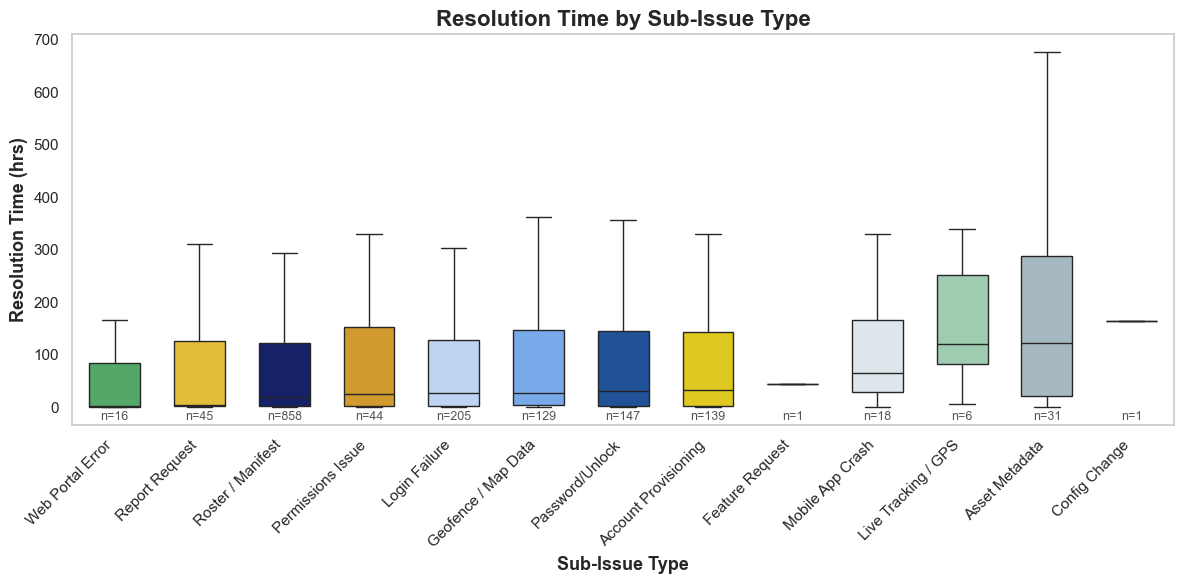

In [91]:
#Personalized pallete

beacon_palette = [
    "#081775",  
    "#0d4eac",  
    "#ffe000",  
    "#65a7fc",  
    "#b6d2fa",  
    "#a1bbc6",  
    "#dce7ed",  
    "#eca313",  
    "#ffce1f", 
    "#47b462",
    "#98d3ae",
    "#fcf18b",
    "#fbb7c6",
    "#fffcDF",
    "#F3f4f5"
]


#If you have more categories than colors, extend automatically
if len(beacon_palette) < len(order):
    # auto-extend using another palette
    extra = sns.color_palette("tab20", n_colors=len(order) - len(beacon_palette))
    beacon_palette = beacon_palette + list(extra)

# ==== Configuration ====
COL_X = 'Sub-Issue Type'
COL_Y = 'Resolution Time (hrs)'

POINT_SIZE = 2.5
POINT_ALPHA = 0.5
POINT_COLOR = 'tab:blue'
JITTER = 0.25

LOW_P = 1
HIGH_P = 99

FIGSIZE = (12, 6)
PALETTE = beacon_palette  # now valid because we'll pass hue=COL_X

# ==== Data prep ====
df = df.rename(columns={c: c.strip() if isinstance(c, str) else c for c in df.columns})

if COL_X not in df.columns or COL_Y not in df.columns:
    raise KeyError(f"Columns not found. Got columns: {list(df.columns)}")

plot_df = df[[COL_X, COL_Y]].copy()
plot_df[COL_Y] = pd.to_numeric(plot_df[COL_Y], errors='coerce')
plot_df = plot_df.dropna(subset=[COL_X, COL_Y])

if plot_df.empty:
    raise ValueError(f"No valid data to plot after cleaning {COL_X}/{COL_Y}.")

order = (
    plot_df.groupby(COL_X)[COL_Y]
    .median()
    .sort_values()
    .index
    .tolist()
)

def _central_slice(g: pd.DataFrame) -> pd.DataFrame:
    if len(g) < 5:
        return g
    lo = np.percentile(g[COL_Y], LOW_P)
    hi = np.percentile(g[COL_Y], HIGH_P)
    return g[(g[COL_Y] >= lo) & (g[COL_Y] <= hi)]

central = (
    plot_df
    .groupby(COL_X, group_keys=False)
    .apply(_central_slice)
    .reset_index(drop=True)
)

use_for_strip = central if not central.empty else plot_df
counts = plot_df[COL_X].value_counts().reindex(order)

# ==== Plot ====
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=FIGSIZE)

# IMPORTANT: pass hue=COL_X and legend=False when using palette without a separate hue variable
sns.boxplot(
    data=plot_df,
    x=COL_X, y=COL_Y,
    order=order,
    hue=COL_X,            # satisfy seaborn requirement for palette
    palette=PALETTE,
    ax=ax,
    showfliers=False,
    width=0.6,
    dodge=False,          # keep one box per category (hue=x could otherwise try dodging)
    legend=False          # avoid a redundant legend
)


for i, (cat, n) in enumerate(counts.items()):
    txt = f"n={int(n)}" if pd.notna(n) else "n=0"
    ax.text(i, 0.02, txt, ha='center', va='center', fontsize=9, color='#555',
            transform=ax.get_xaxis_transform())

ax.set_title('Resolution Time by Sub-Issue Type',fontsize=16,fontweight='bold')
ax.set_xlabel('Sub-Issue Type',fontsize=13,fontweight='bold')
ax.set_ylabel('Resolution Time (hrs)',fontsize=13,fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
#No background grid
ax.grid(False)

plt.xticks(rotation=45, ha='right',fontsize=11)
plt.yticks(fontsize=11)
fig.tight_layout()
plt.show()

# 5. Insights & Recommendations

## Key Findings
- Major ticket volumes where found within the month of September thru the end of November, where most of tickets were received within Tuesday to Thursday.
- Regions with most ticket raised: New York and New England where major locations for those tickets were on: Ellenville, Neversinkg for New York region, and Chelmsford, North Reading for New England.
- The top issue types raised thru Leena AI cases where related to  Data Integrity and Access & Account Management where, major sub-issue types ranking out on those are related to Roster/Manifest, Geofence/Map Data and Asset Metadata (this one are related to Data Integrity), and Login Failure, Password/Unlock and Account Provisioning (this one are related to to Access & Account Management).

## Recommendations
- Demand & Capacity alignment by rebalancing staffing coverage and implementing flex scheduling.
- Proactive Prevention by creating pre-emptive communications and self-service guidance on the top 5 sub-issues and create a kind of seasonlaity playbook.
- Site-Based Root Cause Deep Dives by mapping process steps where issues originate (this can be done virtually or onsite).
- Train Local SMEs for major locations that are raising cases related to the major issues and sub-issues found.
- Shift left with self-service & automation: with this one we are looking to train how to use self-service password reset/unlock (where permitted), train Beacon Buddy to provide steps on "how to" about the access & account management issue they have, and then after they check the standard guided steps, Beacon Buddy will allow to create the Leena AI case. In addition, we have to standarize "account provisioning request" form with mandatory fields to prevent incomplete tickets.


# 6. Lean Six Sigma Analysis – Root Cause Exploration

In this section, we apply Lean Six Sigma tools (Fishbone Diagram and 5 Whys) to explore the root causes behind the most frequent or most impactful ticket categories.

We will:
- Identify the top sub issue category (by volume or resolution time)
- Analyze its distribution by Region and Location
- Use data to support a Fishbone-style breakdown
- Document a 5 Whys analysis in text form

In [30]:
# Top Sub-Issue Type by ticket volume
sub_issue_type_counts = df['Sub-Issue Type'].value_counts()
sub_issue_type_counts.head(10)

Sub-Issue Type
Roster / Manifest       859
Login Failure           205
Password/Unlock         147
Account Provisioning    139
Geofence / Map Data     129
Report Request           45
Permissions Issue        44
Asset Metadata           31
Mobile App Crash         19
Web Portal Error         16
Name: count, dtype: int64

In [39]:
# Top five categories by ticket volume
top_five_sub_issue_type= sub_issue_type_counts.head(5)
top_five_sub_issue_type

Sub-Issue Type
Roster / Manifest       859
Login Failure           205
Password/Unlock         147
Account Provisioning    139
Geofence / Map Data     129
Name: count, dtype: int64

In [41]:
# Analyze each of the top five categories
for sub_issue_type in top_five_sub_issue_type.index:
    print(f"\n=== Sub-Issue Type: {sub_issue_type} ===")
    
    df_sub_top5 = df[df['Sub-Issue Type'] == sub_issue_type]
    
    region_summary = df_sub_top5['Region'].value_counts()
    location_summary = df_sub_top5['Location'].value_counts().head(10)
    
    print("\nRegion Summary:")
    print(region_summary)
    
    print("\nTop 10 Locations:")
    print(location_summary)


=== Sub-Issue Type: Roster / Manifest ===

Region Summary:
Region
Corporate       308
New York        256
New England     160
Central         113
Mid-Atlantic     22
Name: count, dtype: int64

Top 10 Locations:
Location
Beacon            308
Ellenville        179
Gardner            44
Neversink          40
Columbia           32
Chelmsford         29
Wilbraham          29
North Reading      13
Piper              12
Bonner Springs     11
Name: count, dtype: int64

=== Sub-Issue Type: Login Failure ===

Region Summary:
Region
Corporate       86
Central         53
New England     46
New York        14
Mid-Atlantic     6
Name: count, dtype: int64

Top 10 Locations:
Location
Beacon           86
Methuen          11
Crowley          10
Columbia         10
Plainview         9
Chelmsford        9
Wilbraham         6
Las Cruces        5
Lynn              5
North Reading     5
Name: count, dtype: int64

=== Sub-Issue Type: Password/Unlock ===

Region Summary:
Region
Corporate       72
Central    


=== Sub-Issue Type: Roster / Manifest ===


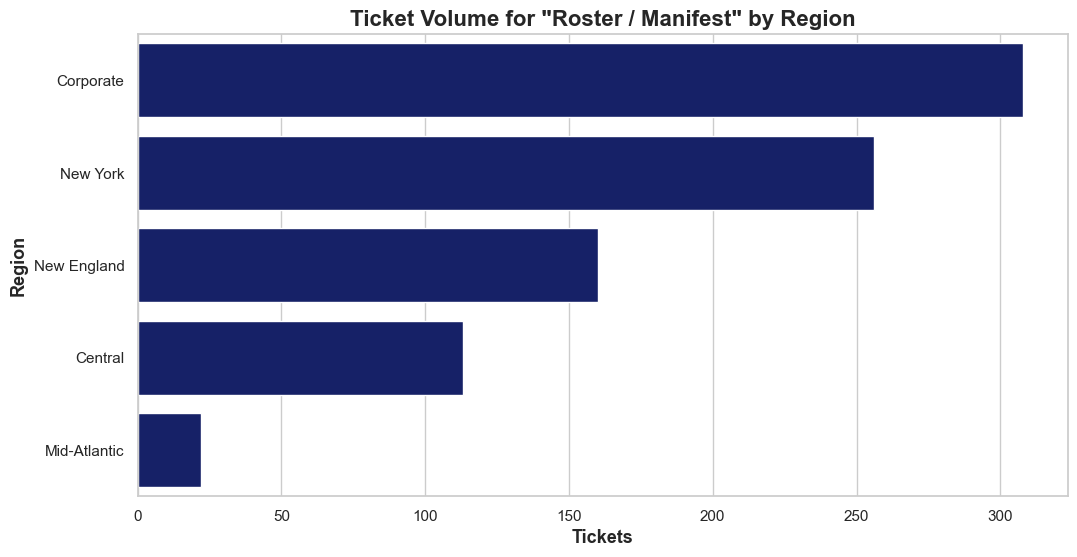

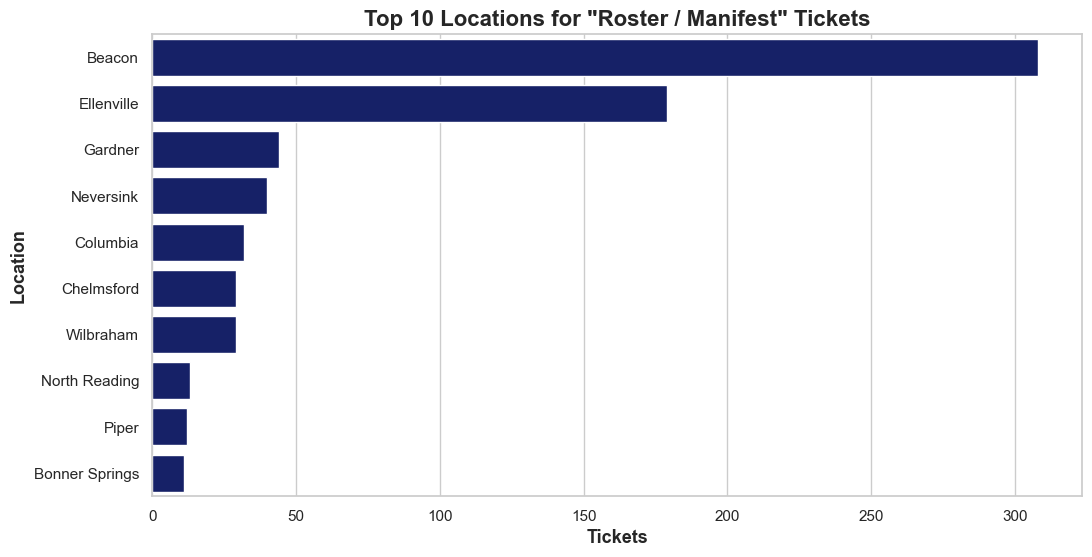


=== Sub-Issue Type: Login Failure ===


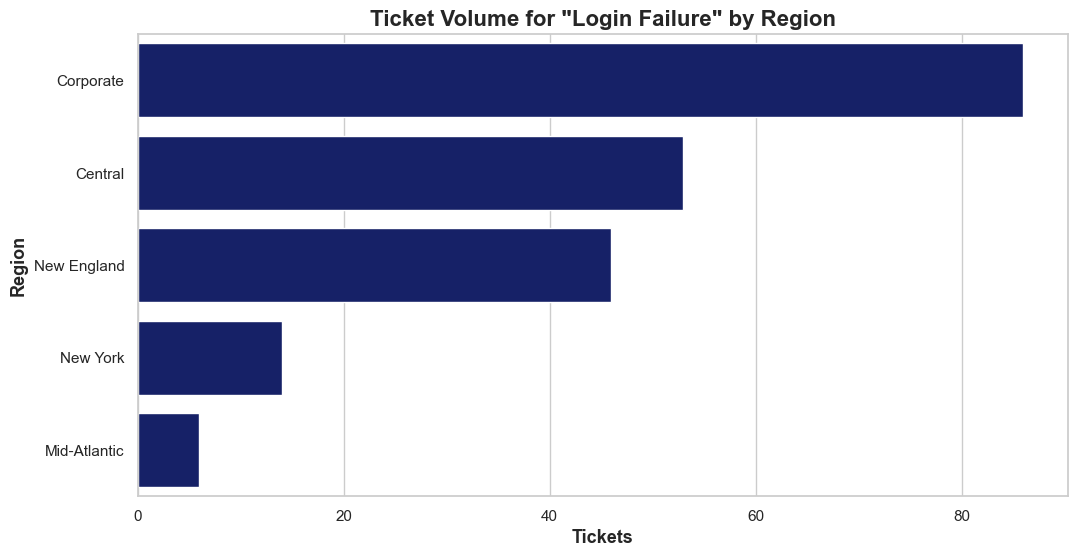

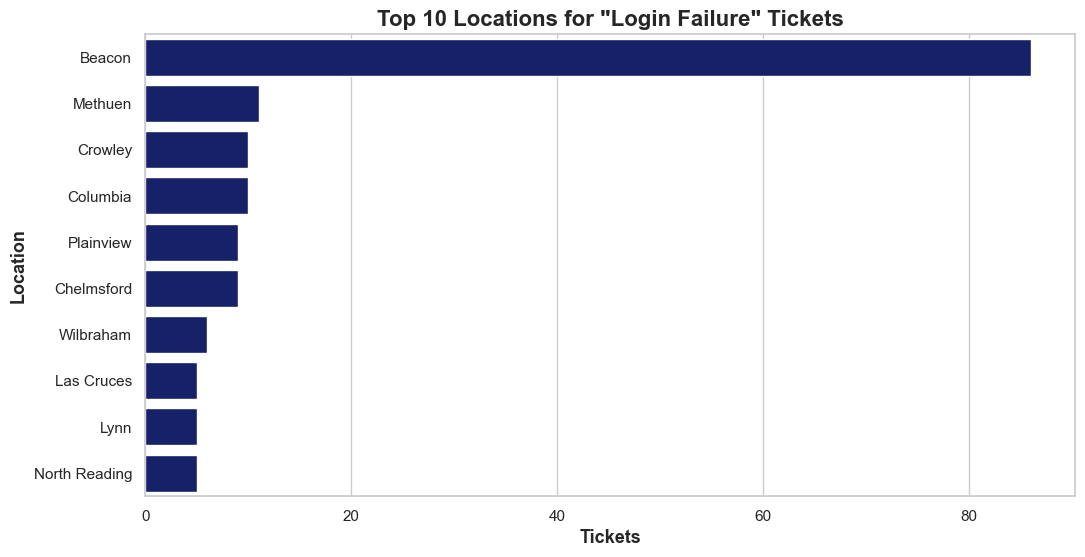


=== Sub-Issue Type: Password/Unlock ===


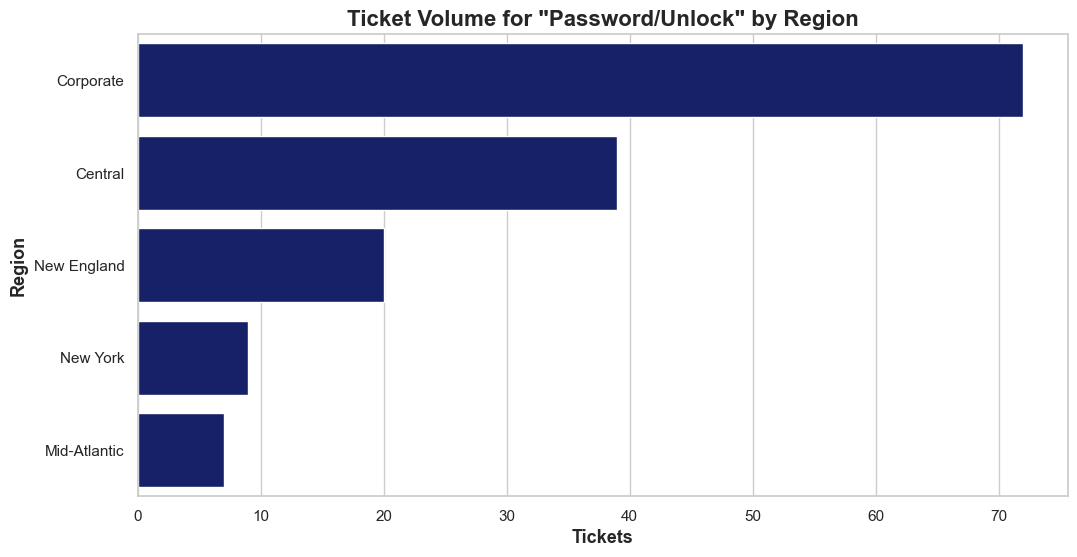

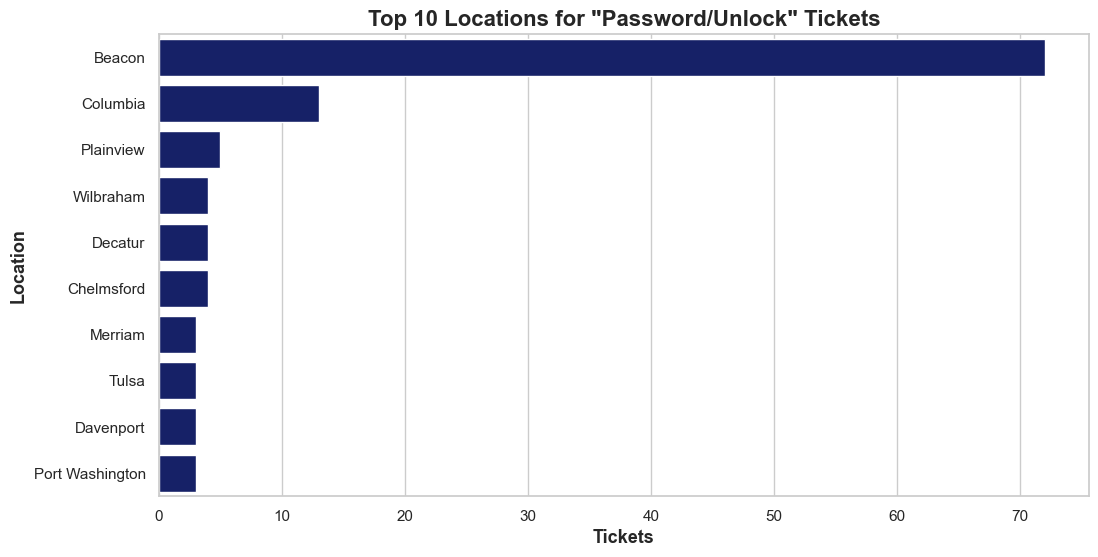


=== Sub-Issue Type: Account Provisioning ===


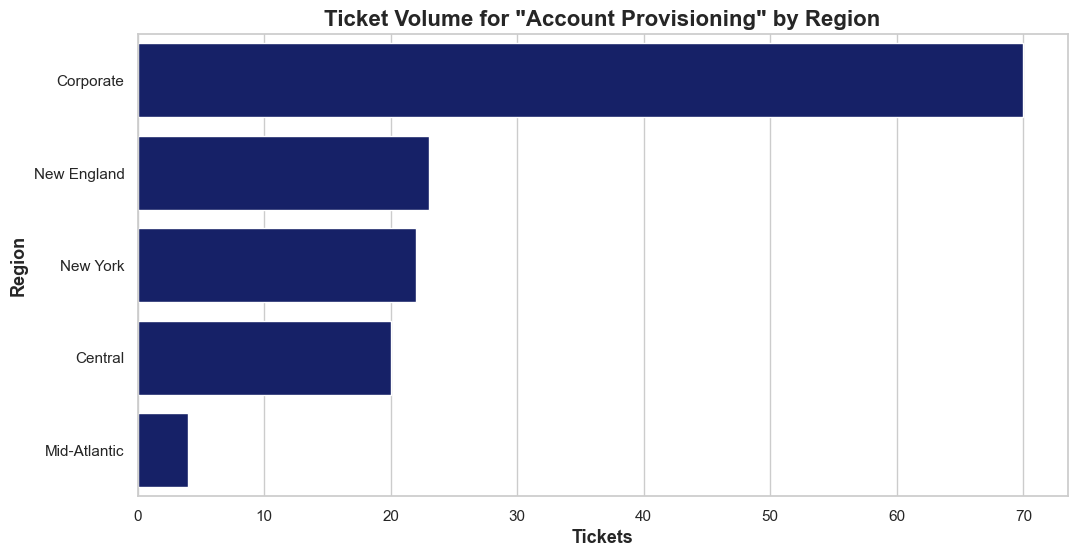

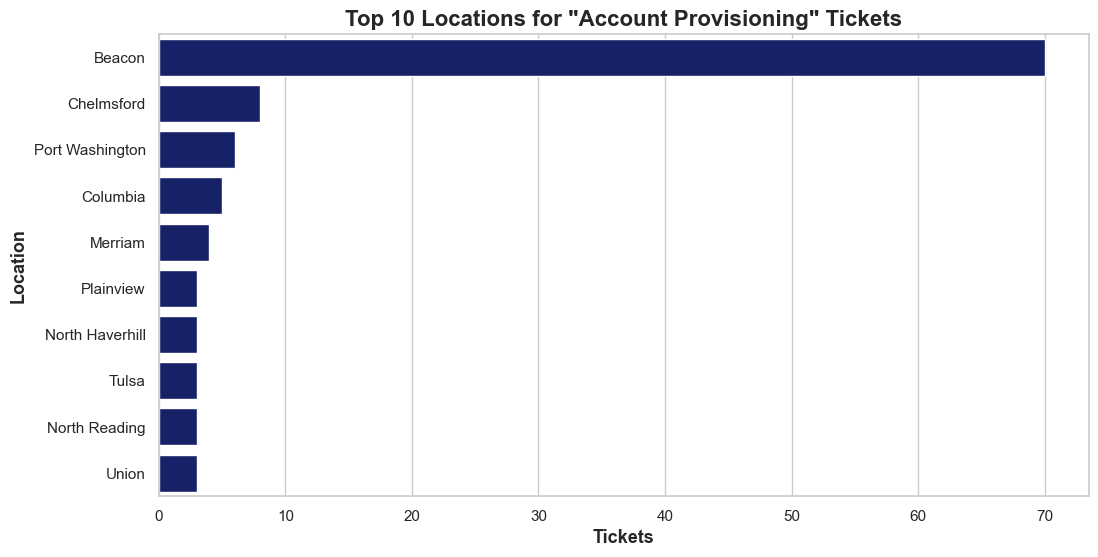


=== Sub-Issue Type: Geofence / Map Data ===


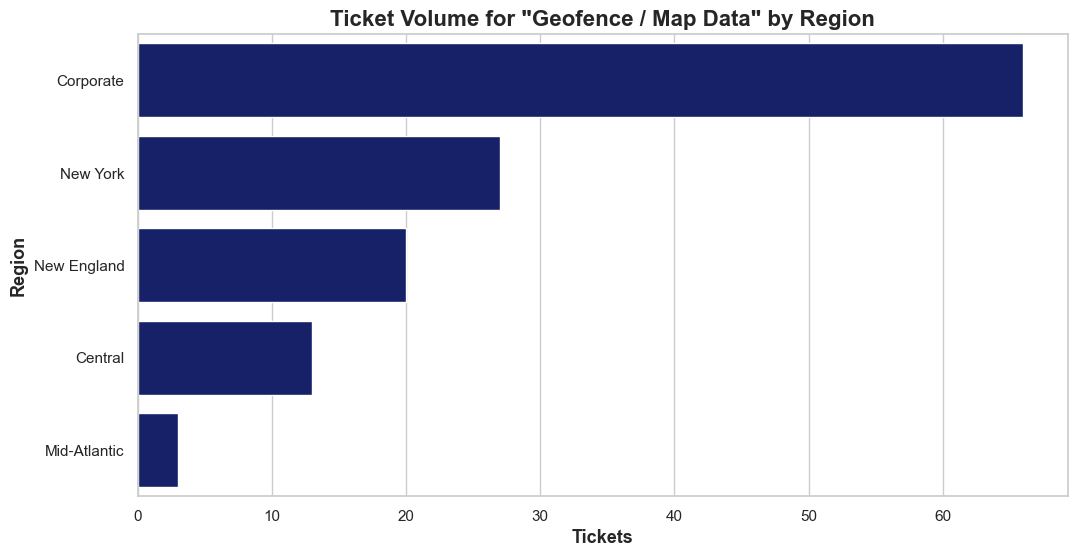

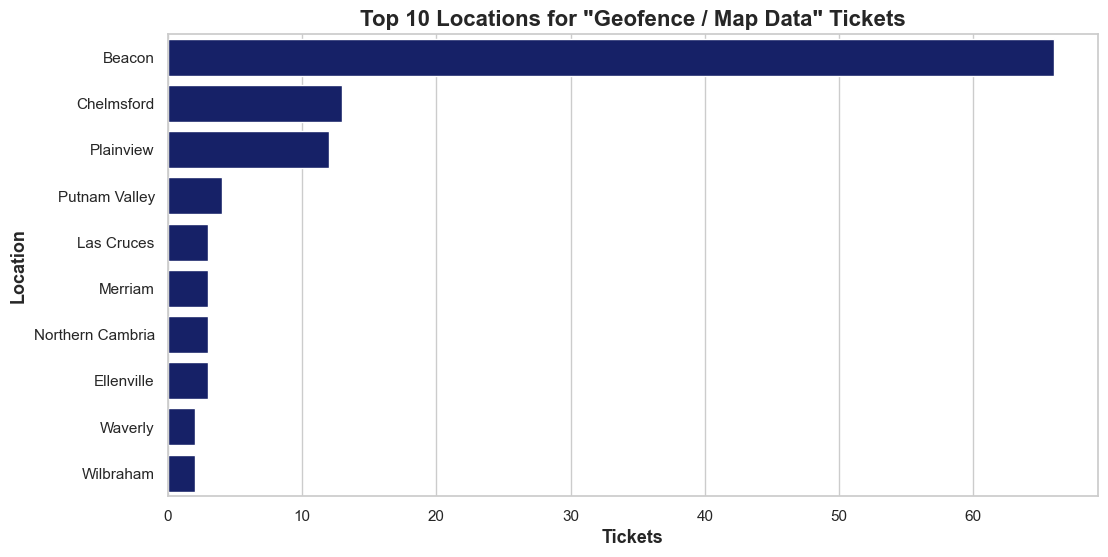

In [45]:
# Top five Sub-Issue Types
top_five_subissues = df['Sub-Issue Type'].value_counts().head(5)

for subissue in top_five_subissues.index:
    print(f"\n=== Sub-Issue Type: {subissue} ===")
    
    df_sub = df[df['Sub-Issue Type'] == subissue]
    
    region_summary = df_sub['Region'].value_counts()
    location_summary = df_sub['Location'].value_counts().head(10)
    
    # Region plot
    sns.barplot(x=region_summary.values, y=region_summary.index, color='#081775')
    plt.title(f'Ticket Volume for "{subissue}" by Region', fontsize=16,fontweight='bold')
    plt.xlabel('Tickets', fontsize=13,fontweight='bold')
    plt.ylabel('Region', fontsize=13,fontweight='bold')
    plt.show()
    
    # Location plot
    sns.barplot(x=location_summary.values, y=location_summary.index, color='#081775')
    plt.title(f'Top 10 Locations for "{subissue}" Tickets', fontsize=16,fontweight='bold')
    plt.xlabel('Tickets', fontsize=13,fontweight='bold')
    plt.ylabel('Location', fontsize=13,fontweight='bold')
    plt.show()

## 6.3 Fishbone Diagram (Conceptual)

We focus on the sub-issue type: **{{sub_issue_type}}**.

We structure potential root causes using common Fishbone branches:

- **People**  
  - Insufficient training for end users in high-volume locations  
  - New hires not familiar with tools or processes  

- **Process**  
  - No standardized workflow for handling this issue  
  - Lack of clear documentation or self-service guides  

- **Technology**  
  - System instability or frequent outages  
  - Legacy applications causing recurring errors  

- **Environment**  
  - High-pressure periods (e.g., start of school year, fiscal close)  
  - Remote locations with limited connectivity  

- **Measurement**  
  - Inconsistent ticket categorization  
  - Missing or inaccurate resolution time tracking  

These hypotheses are supported by:
- Ticket concentration in specific Regions/Locations  
- Repetition of the same Category/Subcategory  
- Patterns in time (e.g., spikes on certain days or months)

## 6.4 5 Whys Analysis

**Problem:** High volume of tickets in sub-issue type: **{{sub_issue_type}}**

1. **Why** is this category generating so many tickets?  
   → Because users frequently encounter this issue during their daily work.

2. **Why** do users frequently encounter this issue?  
   → Because they are not fully aware of the correct process or available tools.

3. **Why** are they not aware of the correct process/tools?  
   → Because onboarding and training materials are not standardized or easily accessible.

4. **Why** are onboarding and training not standardized?  
   → Because there is no owner responsible for maintaining and updating IT user documentation.

5. **Why** is there no owner for documentation?  
   → Because documentation is not formally included as a responsibility in the IT Helpdesk or IT Operations roles.

**Potential Countermeasures:**
- Assign ownership of user documentation and self-service guides.  
- Standardize onboarding training for high-volume Regions/Locations.  
- Promote self-service portals for common issues in this category.

# 7. Advanced Visualizations

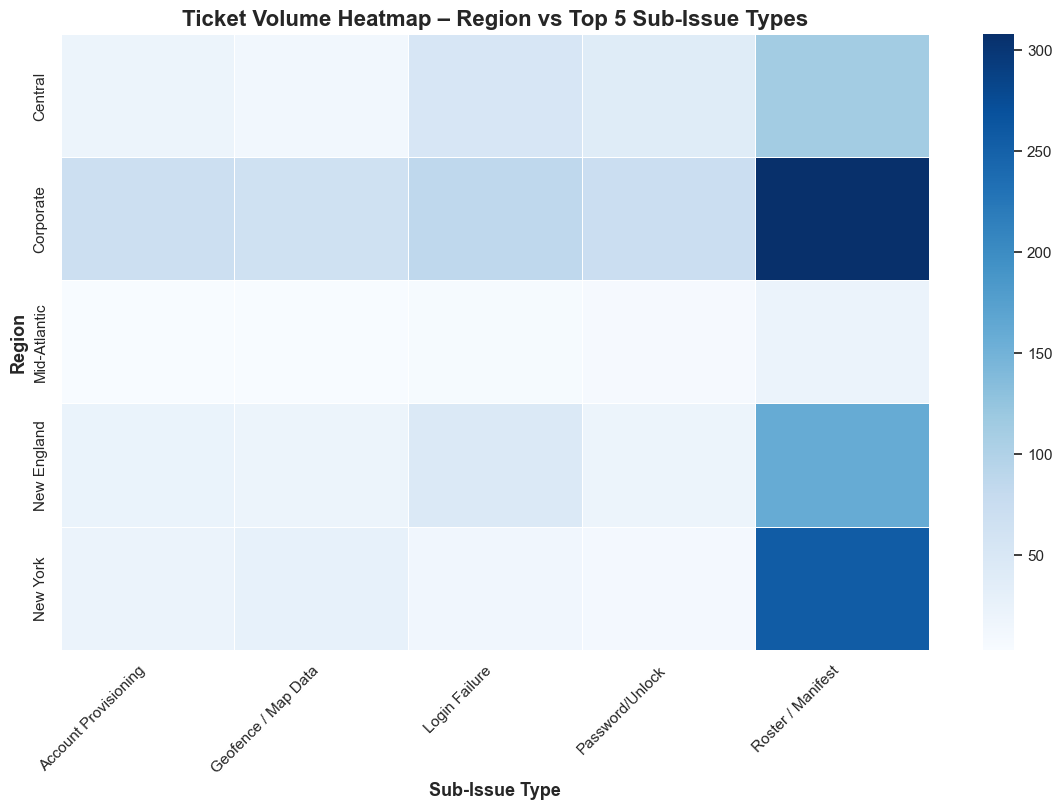

In [54]:
top5 = df['Sub-Issue Type'].value_counts().head(5).index
df_top5 = df[df['Sub-Issue Type'].isin(top5)]

pivot_region_sub = pd.crosstab(df_top5['Region'], df_top5['Sub-Issue Type'])

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_region_sub, cmap='Blues', linewidths=0.5)
plt.title('Ticket Volume Heatmap – Region vs Top 5 Sub-Issue Types', fontsize=16,fontweight='bold')
plt.xlabel('Sub-Issue Type', fontsize=13,fontweight='bold')
plt.ylabel('Region', fontsize=13,fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

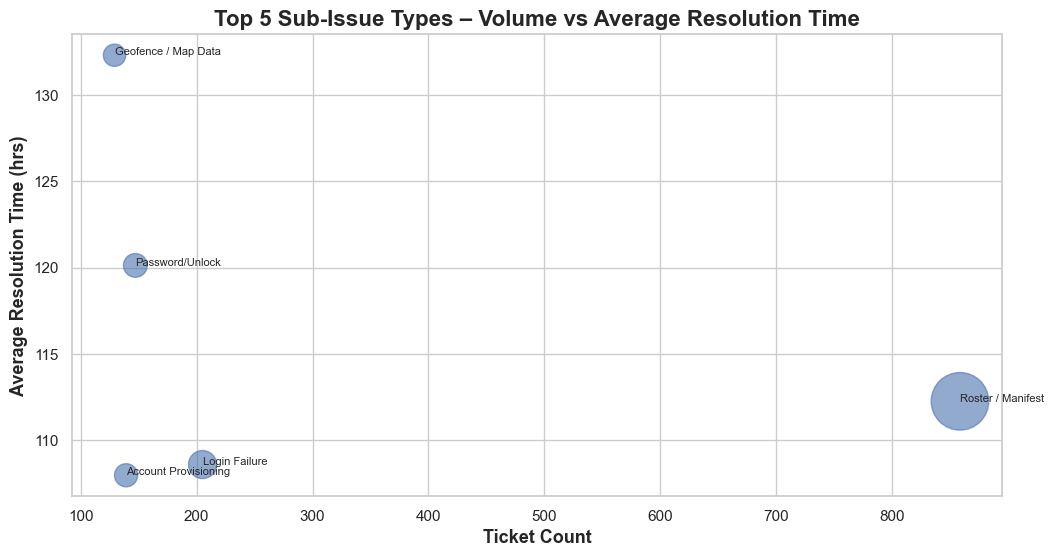

In [55]:
sub_stats = df_top5.groupby('Sub-Issue Type').agg(
    ticket_count=('Sub-Issue Type', 'count'),
    avg_resolution=('Resolution Time (hrs)', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(
    sub_stats['ticket_count'],
    sub_stats['avg_resolution'],
    s=sub_stats['ticket_count'] * 2,
    alpha=0.6
)

for _, row in sub_stats.iterrows():
    plt.text(row['ticket_count'], row['avg_resolution'], row['Sub-Issue Type'], fontsize=8)

plt.xlabel('Ticket Count', fontsize=13,fontweight='bold')
plt.ylabel('Average Resolution Time (hrs)', fontsize=13,fontweight='bold')
plt.title('Top 5 Sub-Issue Types – Volume vs Average Resolution Time', fontsize=16,fontweight='bold')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_6836\3095529040.py:6: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.lineplot(data=monthly_trend, x='Month_Num', y='Tickets', hue='Sub-Issue Type', marker='o', palette=beacon_palette)
C:\Users\brand\AppData\Local\Temp\ipykernel_6836\3095529040.py:10: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.3)


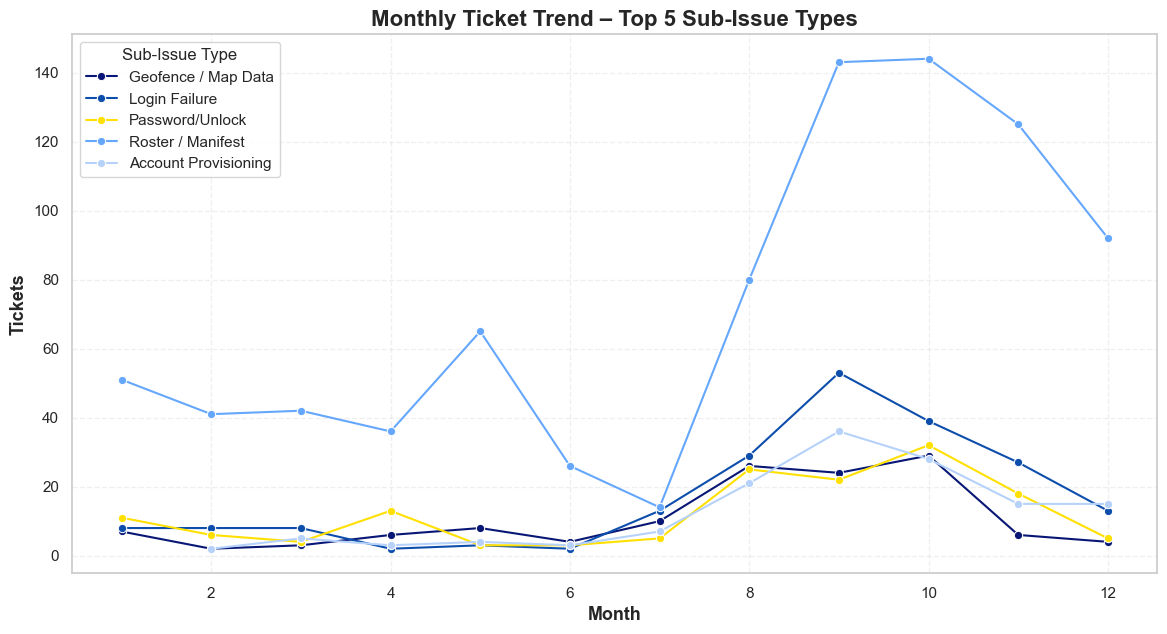

In [63]:
df_top5['Month_Num'] = df_top5['Created On'].dt.month

monthly_trend = df_top5.groupby(['Month_Num', 'Sub-Issue Type']).size().reset_index(name='Tickets')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trend, x='Month_Num', y='Tickets', hue='Sub-Issue Type', marker='o', palette=beacon_palette)
plt.title('Monthly Ticket Trend – Top 5 Sub-Issue Types', fontsize=16,fontweight='bold')
plt.xlabel('Month', fontsize=13,fontweight='bold')
plt.ylabel('Tickets', fontsize=13,fontweight='bold')
plt.grid(False, linestyle='--', alpha=0.3)
plt.show()

# 8. Automated Summary Tables

In [64]:
summary_sub = df_top5.groupby('Sub-Issue Type').agg(
    tickets=('Sub-Issue Type', 'count'),
    avg_resolution=('Resolution Time (hrs)', 'mean'),
    unique_locations=('Location', 'nunique'),
    unique_regions=('Region', 'nunique')
).reset_index().sort_values('tickets', ascending=False)

summary_sub

,Sub-Issue Type,tickets,avg_resolution,unique_locations,unique_regions
4,Roster / Manifest,859,112.244872,72,5
2,Login Failure,205,108.575854,44,5
3,Password/Unlock,147,120.124150,34,5
0,Account Provisioning,139,107.956954,36,5
1,Geofence / Map Data,129,132.308915,26,5


In [65]:
summary_region_sub = df_top5.groupby(['Region', 'Sub-Issue Type']).agg(
    tickets=('Sub-Issue Type', 'count'),
    avg_resolution=('Resolution Time (hrs)', 'mean')
).reset_index().sort_values('tickets', ascending=False)

summary_region_sub

,Region,Sub-Issue Type,tickets,avg_resolution
9,Corporate,Roster / Manifest,308,155.637785
24,New York,Roster / Manifest,256,57.314779
19,New England,Roster / Manifest,160,63.688333
4,Central,Roster / Manifest,113,177.928466
7,Corporate,Login Failure,86,109.257171
8,Corporate,Password/Unlock,72,125.909259
5,Corporate,Account Provisioning,70,136.170000
6,Corporate,Geofence / Map Data,66,128.550505
2,Central,Login Failure,53,94.382075
17,New England,Login Failure,46,64.395290


In [66]:
summary_location_sub = df_top5.groupby(['Location', 'Sub-Issue Type']).agg(
    tickets=('Sub-Issue Type', 'count'),
    avg_resolution=('Resolution Time (hrs)', 'mean')
).reset_index().sort_values('tickets', ascending=False).head(50)

summary_location_sub

,Location,Sub-Issue Type,tickets,avg_resolution
9,Beacon,Roster / Manifest,308,155.637785
65,Ellenville,Roster / Manifest,179,7.299441
7,Beacon,Login Failure,86,109.257171
8,Beacon,Password/Unlock,72,125.909259
5,Beacon,Account Provisioning,70,136.170000
6,Beacon,Geofence / Map Data,66,128.550505
75,Gardner,Roster / Manifest,44,15.975000
136,Neversink,Roster / Manifest,40,23.815833
37,Columbia,Roster / Manifest,32,257.363542
28,Chelmsford,Roster / Manifest,29,91.600000


In [67]:
summary_location_sub = df_top5.groupby(['Location', 'Sub-Issue Type']).agg(
    tickets=('Sub-Issue Type', 'count'),
    avg_resolution=('Resolution Time (hrs)', 'mean')
).reset_index().sort_values('tickets', ascending=False).head(50)

summary_location_sub

,Location,Sub-Issue Type,tickets,avg_resolution
9,Beacon,Roster / Manifest,308,155.637785
65,Ellenville,Roster / Manifest,179,7.299441
7,Beacon,Login Failure,86,109.257171
8,Beacon,Password/Unlock,72,125.909259
5,Beacon,Account Provisioning,70,136.170000
6,Beacon,Geofence / Map Data,66,128.550505
75,Gardner,Roster / Manifest,44,15.975000
136,Neversink,Roster / Manifest,40,23.815833
37,Columbia,Roster / Manifest,32,257.363542
28,Chelmsford,Roster / Manifest,29,91.600000


# 9. Power BI / Tableau Dashboard Design (Based on This EDA)

Using the outputs of this analysis, we can design a Helpdesk Operations dashboard with:

## Dashboard Pages
1. **Executive Overview**
   - Total tickets
   - Tickets by Region
   - Tickets by Sub‑Issue Type (Top 5)
   - Monthly trend
   - Avg resolution time

2. **Sub‑Issue Type Deep Dive**
   - Volume vs Avg Resolution Time (bubble chart)
   - Region × Sub‑Issue Type heatmap
   - Top 10 locations for each Sub‑Issue Type
   - Trend lines for each Sub‑Issue Type

3. **Region & Location View**
   - Tickets by Region
   - Tickets by Location
   - Region × Sub‑Issue Type matrix
   - SLA (future-ready if added later)

4. **Operational Performance**
   - Resolution time distribution
   - Resolution time by Sub‑Issue Type
   - Peak hours and weekdays
   - Ticket aging buckets

## Data Sources for BI/Tableau
- `helpdesk_tickets.xlsx` (raw data)
- `summary_location_sub.csv`
- `summary_region_sub.csv`
- `summary_sub.csv`

These files can be loaded into Power BI or Tableau to build interactive dashboards that mirror and extend this EDA.